In [28]:
import numpy as np
import os
import glob
import PIL
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle
import pandas as pd
from sklearn.utils import shuffle
import tensorflow as tf

In [6]:
def load_dataset(path):
    label_key = {'center':0,
             'down':1,
             'left':2,
             'right':3,
             'up':4}
    X = []
    y = []
    for class_name in label_key.keys():
        class_path = os.path.join(path, class_name)
        files = glob.glob(os.path.join(class_path,'*.jpg'))
        for f in files:
            image = np.asarray(PIL.Image.open(f))
            image = np.expand_dims(image, axis=0)
            X.append(image)
            y.append(label_key[class_name])
    return np.concatenate(X), np.array(y)

def reshape_for_randomforrest(images):
    return np.reshape(images, (-1, images.shape[1]*images.shape[2]))

In [19]:
def load_tuned_rf_model(path:str):
    model = pickle.load(open(path, 'rb'))
    return model
    
def load_tuned_cnn_model(path:str):
    model = tf.keras.models.load_model(path)
    return model

def plot_confusion_matrix(ytrue, ypred, title, path):
    
    confusion_arr = confusion_matrix(ytrue, ypred)

    df_cm = pd.DataFrame(confusion_arr, 
      index = ['center', 'down', 'left', 'right', 'up'],
      columns = ['center', 'down', 'left', 'right', 'up'])

    fig = plt.figure(figsize=(10,10))
    plt.clf()
    ax = fig.add_subplot(111)
    ax.set_aspect(1)
    cmap = sns.cubehelix_palette(light=1, as_cmap=True)
    res = sns.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0, fmt='1d', cmap=cmap, cbar=False)
    res.invert_yaxis()
    plt.title(title)
    filename = '_'.join(title.lower().split())
    savepath = os.path.join(path, f'{filename}.png')
    plt.savefig(f'{filename}.png', dpi=100, bbox_inches='tight')
    plt.show()
    plt.close()
    report = classification_report(ytrue, ypred)
    print(report)

def compare_models():
    pass

In [17]:
# load test dataset
X_test, y_test = load_dataset('../data/test/')
X_test, y_test = shuffle(X_test, y_test, random_state=0)

# transform data fo random forrest inference 
transformed_test = reshape_for_randomforrest(X_test)

In [22]:
tuned_rf_model = load_tuned_rf_model('../models/tuned_rf.sav')
tuned_cnn = load_tuned_cnn_model('../models/tuned_cnn.h5')

In [24]:
rf_predictions = tuned_rf_model.predict(transformed_test)
cnn_predictions = tuned_cnn.predict(X_test)
cnn_predictions = [np.argmax(pred) for pred in cnn_predictions]

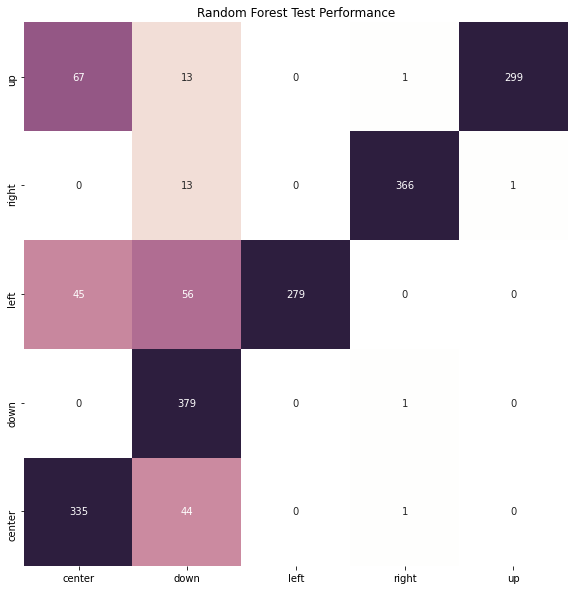

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       380
           1       0.75      1.00      0.86       380
           2       1.00      0.73      0.85       380
           3       0.99      0.96      0.98       380
           4       1.00      0.79      0.88       380

    accuracy                           0.87      1900
   macro avg       0.90      0.87      0.87      1900
weighted avg       0.90      0.87      0.87      1900



In [30]:
plot_confusion_matrix(y_test, rf_predictions, 'Random Forest Test Performance', './plots/')

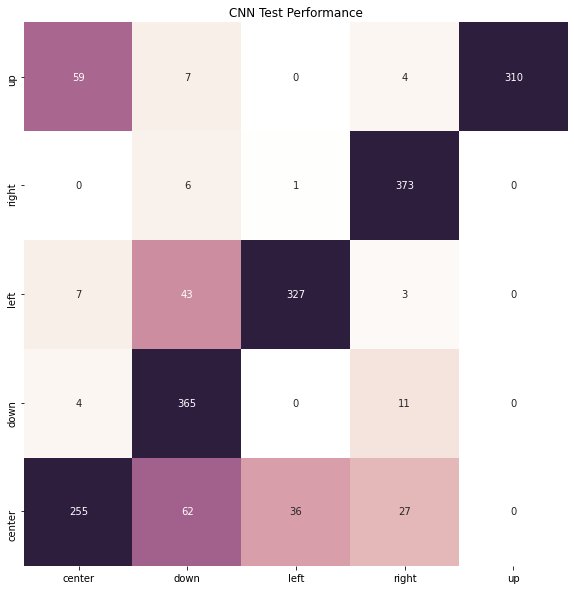

              precision    recall  f1-score   support

           0       0.78      0.67      0.72       380
           1       0.76      0.96      0.85       380
           2       0.90      0.86      0.88       380
           3       0.89      0.98      0.93       380
           4       1.00      0.82      0.90       380

    accuracy                           0.86      1900
   macro avg       0.87      0.86      0.86      1900
weighted avg       0.87      0.86      0.86      1900



In [31]:
plot_confusion_matrix(y_test, cnn_predictions, 'CNN Test Performance', './plots/')

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10,10))

axs[0].plot(acc, label='Training Acc')
axs[0].plot(val_acc, label='Dev Acc')

axs[0].set_title('Accuracy')
axs[0].legend()

axs[1].plot(loss, label='Training Loss')
axs[1].plot(val_loss, label='Dev Loss')
axs[1].set_title('Loss')
axs[1].legend()